###Testing unit

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv('model.csv')

In [ ]:
df.columns = [col.strip() for col in df.columns]

In [ ]:
dummy = pd.concat([pd.get_dummies(df.product_category).astype(int),pd.get_dummies(df.day).astype(int)],axis=1)

In [ ]:
df = pd.concat([df,dummy],axis=1)

In [ ]:
df = df[list(df.dtypes[df.dtypes!=object].index)]

In [ ]:
y_svd = df.shares

In [ ]:
y = np.log(df.shares)

In [ ]:
del df['shares']

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
X = df.copy()

Define parameters for Gridsearch, make a pipeline with MLPRegressor and Standard Scaler and perform Gridsearch

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

parameters = {
    'mlpregressor__hidden_layer_sizes': [(20, 10, 5), (10, 5, 3)],
    'mlpregressor__solver': ['sgd'],
    'mlpregressor__alpha': 10.0 ** -np.arange(-1, 2),
    'mlpregressor__max_iter': [10000]
}

pipe = make_pipeline(StandardScaler(), MLPRegressor())

gs = GridSearchCV(estimator=pipe, param_grid=parameters, cv=5, verbose=0)
gs.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('mlpregressor', MLPRegressor())]),
             param_grid={'mlpregressor__alpha': array([10. ,  1. ,  0.1]),
                         'mlpregressor__hidden_layer_sizes': [(20, 10, 5),
                                                              (10, 5, 3)],
                         'mlpregressor__max_iter': [10000],
                         'mlpregressor__solver': ['sgd']})

Linear Regression MSE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.7365443164458033


Random Forest MSE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.7084393377551345


Ridge Regression MSE

In [ ]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

Ridge Regression Mean Squared Error: 0.7365391001668258


Lasso Regression MSE

In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Adjust alpha as needed

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

Lasso Regression Mean Squared Error: 0.7723263911221732


KernelRidge MSE

In [ ]:
from sklearn.kernel_ridge import KernelRidge

# Create a Kernel Ridge regression model
kernel_ridge_model = KernelRidge(alpha=1.0, kernel='rbf')  # Adjust alpha and kernel as needed

# Train the model
kernel_ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_kernel_ridge = kernel_ridge_model.predict(X_test)

# Evaluate the model
mse_kernel_ridge = mean_squared_error(y_test, y_pred_kernel_ridge)
print("Kernel Ridge Regression Mean Squared Error:", mse_kernel_ridge)

Kernel Ridge Regression Mean Squared Error: 56.5288957683235


Elastic Net MSE

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an Elastic Net regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Train the model
elastic_net_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate the model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("Elastic Net Regression Mean Squared Error:", mse_elastic_net)


Elastic Net Regression Mean Squared Error: 0.7716485029972295


Random forest metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R^2):", r2_rf)


Random Forest Regression Metrics:
Mean Squared Error (MSE): 0.7038926139707751
Root Mean Squared Error (RMSE): 0.8389830832446952
Mean Absolute Error (MAE): 0.624156833031446
R-squared (R^2): 0.16859075133113166


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Generate some synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Linear Regression metrics

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)

# Calculate evaluation metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics for Linear Regression
print("Linear Regression - Mean Absolute Error:", mae_linear)
print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - Root Mean Squared Error:", rmse_linear)
print("Linear Regression - R-squared:", r2_linear)


Linear Regression - Mean Absolute Error: 0.6376556887972687
Linear Regression - Mean Squared Error: 0.7365443164458033
Linear Regression - Root Mean Squared Error: 0.8582216010132834
Linear Regression - R-squared: 0.13002389200669262


Ridge Regression metrics

In [ ]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Train the model
ridge_regressor.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_regressor.predict(X_test)

# Calculate evaluation metrics for Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics for Ridge Regression
print("Ridge Regression - Mean Absolute Error:", mae_ridge)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - Root Mean Squared Error:", rmse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)


Ridge Regression - Mean Absolute Error: 0.6376753702141652
Ridge Regression - Mean Squared Error: 0.7365391001668258
Ridge Regression - Root Mean Squared Error: 0.8582185620031915
Ridge Regression - R-squared: 0.13003005326268458


Lasso Regression metrics

In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_regressor = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Train the model
lasso_regressor.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_regressor.predict(X_test)

# Calculate evaluation metrics for Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics for Lasso Regression
print("Lasso Regression - Mean Absolute Error:", mae_lasso)
print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - Root Mean Squared Error:", rmse_lasso)
print("Lasso Regression - R-squared:", r2_lasso)


Lasso Regression - Mean Absolute Error: 0.6612829549985716
Lasso Regression - Mean Squared Error: 0.7723263911221732
Lasso Regression - Root Mean Squared Error: 0.8788210233728897
Lasso Regression - R-squared: 0.08775956470444701


Kernel Ridge metrics

In [ ]:
from sklearn.kernel_ridge import KernelRidge

# Initialize Kernel Ridge Regression model
kernel_ridge_regressor = KernelRidge(alpha=1.0, kernel='rbf')  # You can adjust the alpha parameter for regularization strength and choose different kernels

# Train the model
kernel_ridge_regressor.fit(X_train, y_train)

# Make predictions
y_pred_kernel_ridge = kernel_ridge_regressor.predict(X_test)

# Calculate evaluation metrics for Kernel Ridge Regression
mae_kernel_ridge = mean_absolute_error(y_test, y_pred_kernel_ridge)
mse_kernel_ridge = mean_squared_error(y_test, y_pred_kernel_ridge)
rmse_kernel_ridge = np.sqrt(mse_kernel_ridge)
r2_kernel_ridge = r2_score(y_test, y_pred_kernel_ridge)

# Print the evaluation metrics for Kernel Ridge Regression
print("Kernel Ridge Regression - Mean Absolute Error:", mae_kernel_ridge)
print("Kernel Ridge Regression - Mean Squared Error:", mse_kernel_ridge)
print("Kernel Ridge Regression - Root Mean Squared Error:", rmse_kernel_ridge)
print("Kernel Ridge Regression - R-squared:", r2_kernel_ridge)


Kernel Ridge Regression - Mean Absolute Error: 7.46205633617069
Kernel Ridge Regression - Mean Squared Error: 56.5288957683235
Kernel Ridge Regression - Root Mean Squared Error: 7.518570061409516
Kernel Ridge Regression - R-squared: -65.76962625548155


Elastic Net metrics

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize Elastic Net Regression model
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha parameter for regularization strength and l1_ratio for the mix of penalties

# Train the model
elastic_net_regressor.fit(X_train, y_train)

# Make predictions
y_pred_elastic_net = elastic_net_regressor.predict(X_test)

# Calculate evaluation metrics for Elastic Net Regression
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

# Print the evaluation metrics for Elastic Net Regression
print("Elastic Net Regression - Mean Absolute Error:", mae_elastic_net)
print("Elastic Net Regression - Mean Squared Error:", mse_elastic_net)
print("Elastic Net Regression - Root Mean Squared Error:", rmse_elastic_net)
print("Elastic Net Regression - R-squared:", r2_elastic_net)


Elastic Net Regression - Mean Absolute Error: 0.6612359838400483
Elastic Net Regression - Mean Squared Error: 0.7716485029972295
Elastic Net Regression - Root Mean Squared Error: 0.8784352582844279
Elastic Net Regression - R-squared: 0.08856025851122185


Scatter plot of actual vs predicted values

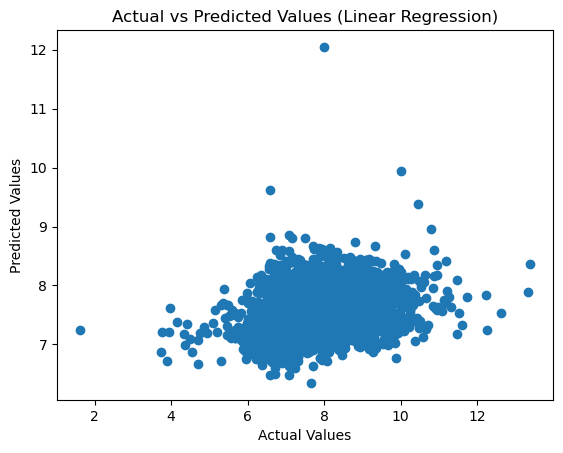

In [ ]:
# plot with actual vs predicted values obtained from linear regression
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()


Cross Validation for linear regression

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize Linear Regression model
linear_regressor = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_regressor, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))
print("Standard deviation of R-squared:", np.std(cv_scores))


Cross-Validation R-squared scores: [0.14485827 0.12094545 0.13669471 0.12301129 0.13673816]
Mean R-squared: 0.13244957788959538
Standard deviation of R-squared: 0.009075406150424313


Cross validation ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Initialize Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Perform cross-validation
cv_scores_ridge = cross_val_score(ridge_regressor, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Ridge Regression - Cross-Validation R-squared scores:", cv_scores_ridge)
print("Ridge Regression - Mean R-squared:", np.mean(cv_scores_ridge))
print("Ridge Regression - Standard deviation of R-squared:", np.std(cv_scores_ridge))


Ridge Regression - Cross-Validation R-squared scores: [0.14485157 0.12137886 0.13653981 0.12283199 0.13703538]
Ridge Regression - Mean R-squared: 0.1325275213767389
Ridge Regression - Standard deviation of R-squared: 0.009017731992717236


Cross validation lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Initialize Lasso Regression model
lasso_regressor = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength

# Perform cross-validation
cv_scores_lasso = cross_val_score(lasso_regressor, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Lasso Regression - Cross-Validation R-squared scores:", cv_scores_lasso)
print("Lasso Regression - Mean R-squared:", np.mean(cv_scores_lasso))
print("Lasso Regression - Standard deviation of R-squared:", np.std(cv_scores_lasso))


Lasso Regression - Cross-Validation R-squared scores: [0.09607508 0.09484996 0.092107   0.08410064 0.09528816]
Lasso Regression - Mean R-squared: 0.09248416632446377
Lasso Regression - Standard deviation of R-squared: 0.0043995406181326704
